In [1]:
# Sel 1: Import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

# Atur agar plot tampil di notebook
%matplotlib inline

In [2]:
# Sel 2: Muat data
# Kita gabungkan X dan y ke dalam satu DataFrame untuk EDA yang lebih mudah
housing = fetch_california_housing()
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

print("Data berhasil dimuat.")
df.head()

Data berhasil dimuat.


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
# Sel 3: Informasi dasar dataset
print("Informasi Dataset:")
df.info()

print("\nStatistik Deskriptif:")
df.describe()

# Cek nilai hilang (missing values)
print(f"\nJumlah nilai hilang:\n{df.isnull().sum()}")
# Hasilnya: Tidak ada nilai hilang!

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB

Statistik Deskriptif:

Jumlah nilai hilang:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


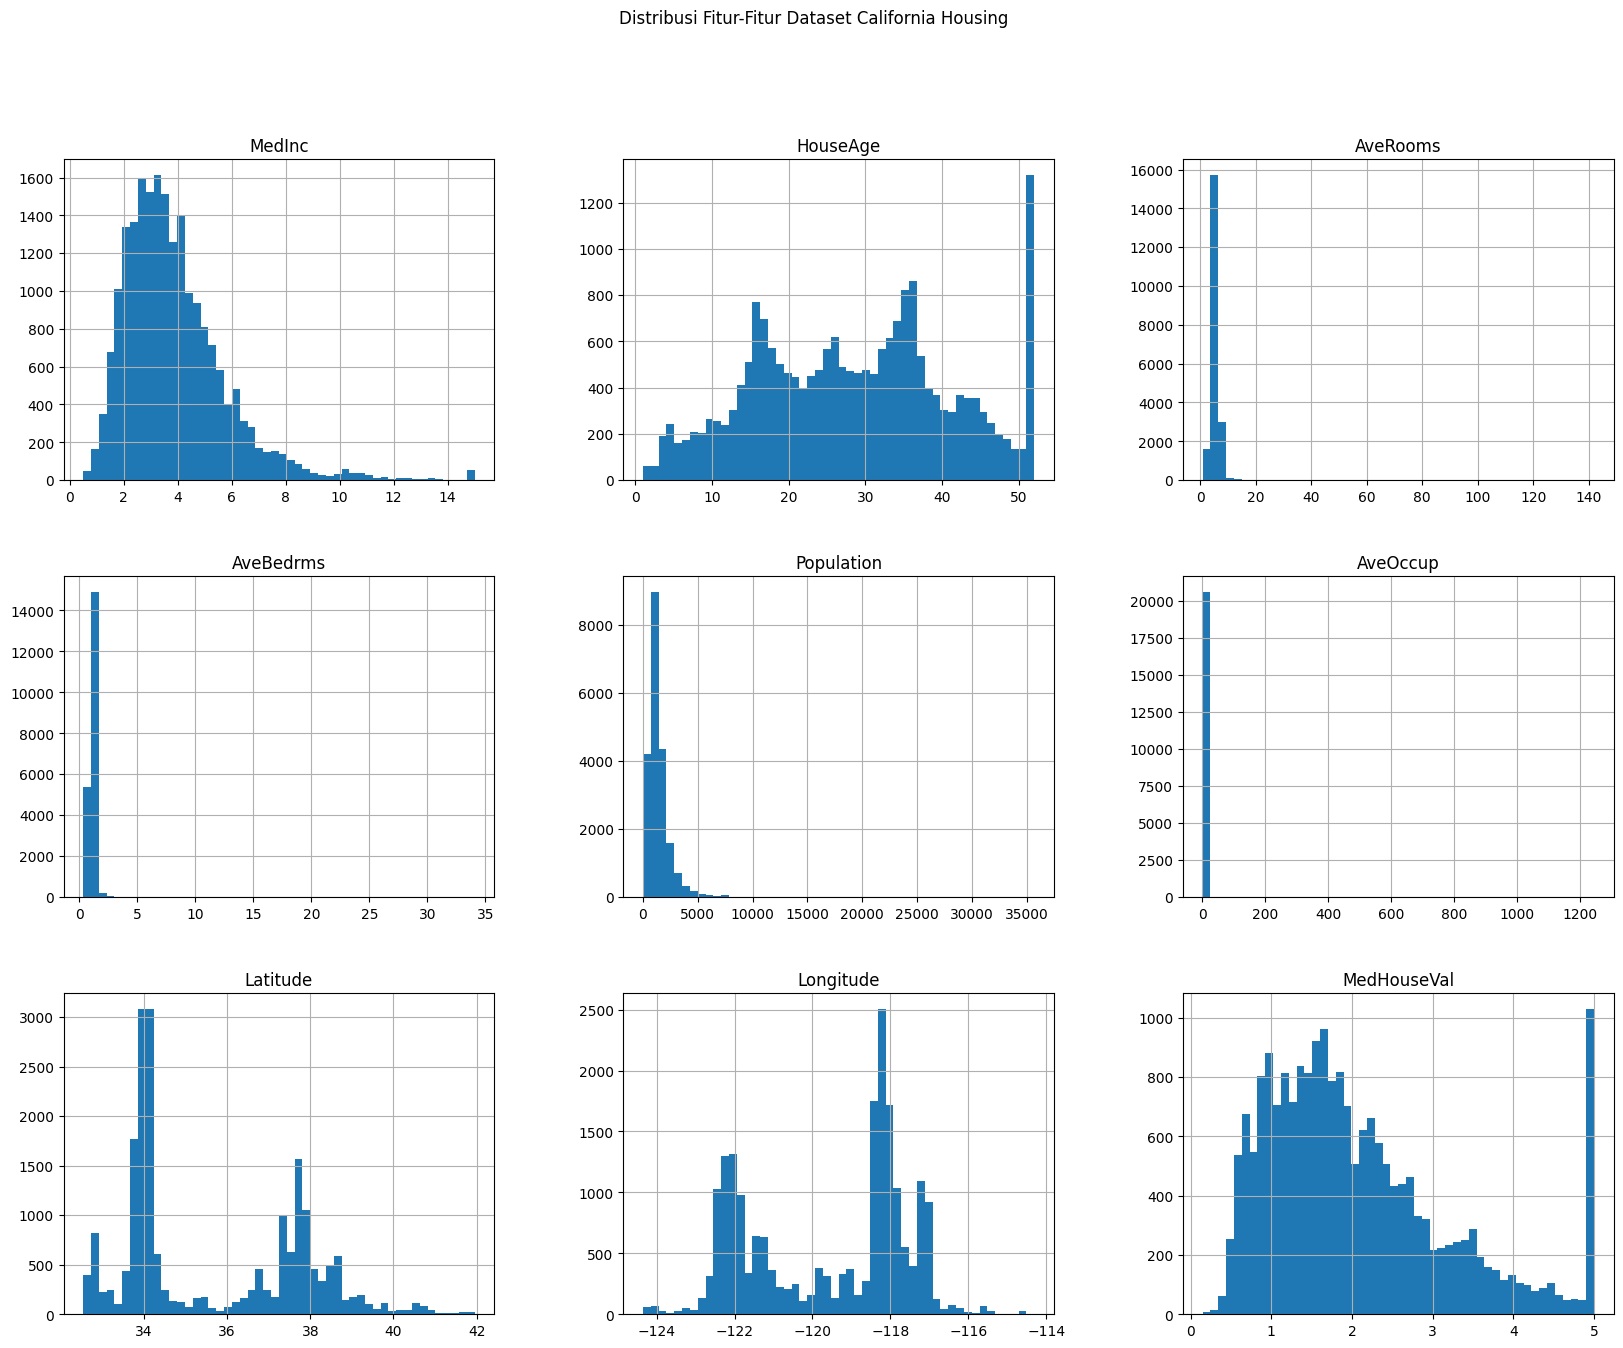

In [4]:
# Sel 4: Visualisasi distribusi setiap fitur
# Ini membantu kita melihat apakah ada data yang miring (skewed)
df.hist(bins=50, figsize=(20, 15))
plt.suptitle("Distribusi Fitur-Fitur Dataset California Housing")
plt.show()

# Dari sini kita bisa lihat:
# - MedInc, AveRooms, AveBedrms, Population, AveOccup sangat miring ke kanan.
# - HouseAge merata.
# - MedHouseVal (target kita) juga miring ke kanan dan memiliki batas atas (cap).

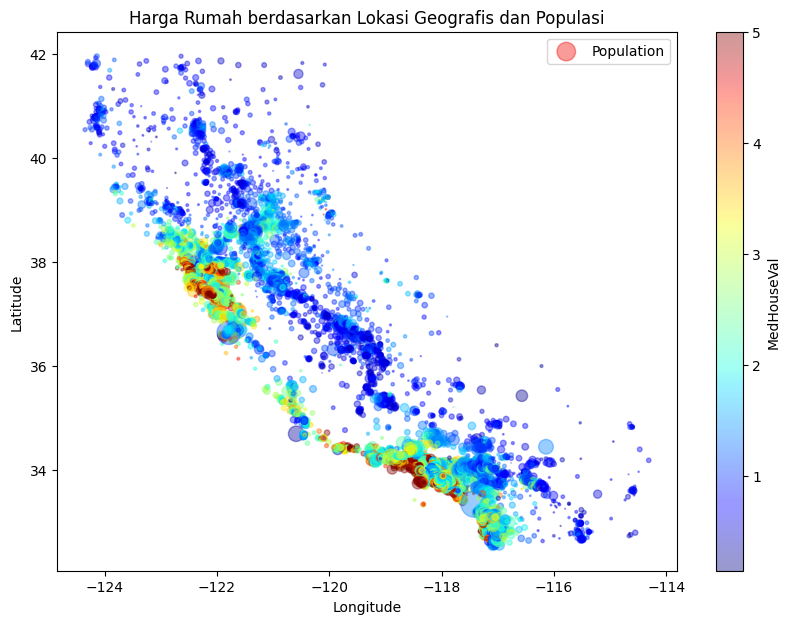

In [5]:
# Sel 5: Visualisasi data geografis (Latitude & Longitude)
# Ini adalah fitur spesial dari dataset ini
df.plot(
    kind="scatter", 
    x="Longitude", 
    y="Latitude", 
    alpha=0.4,  # Transparansi untuk melihat kepadatan
    s=df["Population"]/100,  # Ukuran titik berdasarkan populasi
    label="Population", 
    figsize=(10,7),
    c="MedHouseVal",  # Warna berdasarkan harga rumah
    cmap=plt.get_cmap("jet"), 
    colorbar=True
)
plt.title("Harga Rumah berdasarkan Lokasi Geografis dan Populasi")
plt.legend()
plt.show()

# Kesimpulan: Rumah di dekat pantai (misal: Bay Area, LA, San Diego)
# cenderung lebih mahal.

MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64


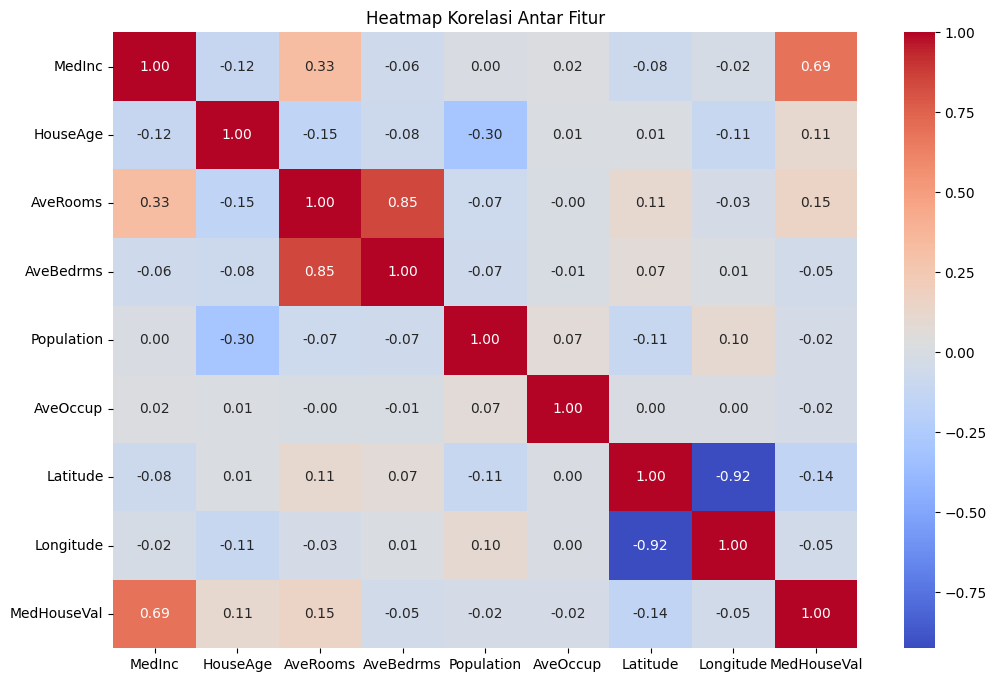

In [6]:
# Sel 6: Melihat korelasi antar fitur
# Kita ingin tahu fitur apa yang paling berpengaruh terhadap harga
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()

# Fokus pada korelasi dengan target (MedHouseVal)
print(corr_matrix["MedHouseVal"].sort_values(ascending=False))

# Buat heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

# Kesimpulan:
# - MedInc (Pendapatan) memiliki korelasi positif terkuat (0.69). Ini wajar.
# - AveRooms memiliki korelasi positif kecil (0.15).
# - Latitude memiliki korelasi negatif (-0.14).